## HOUSE PRICE PREDICTION

<br>**DIMAS MAULANA**
<br>**UJIAN REMEDIAL - MODUL 3**

## Variable Description 

Notes on Specific Variables
Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

Acknowledgements

### A. Data Cleaning & Preprocessing (15 poin)

Untuk ujian ini, pakai data 5000 baris data pertama [0:5000] saja. 

1. Jalankan data cleaning & preprocessing sesuai kondisi data dan tujuan pembuatan model!
2. Beri penjelasan dan argumentasi setiap langkah Anda dalam Data Cleaning & Preprocessing!

In [1]:
import sqlalchemy as db
import mysql.connector
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as st
from scipy import stats
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

In [2]:
df = pd.read_csv('house.csv')

In [3]:
df_copy = df.copy()

Saya membuat df_copy dari dataset sebagai langkah awal sebelum data cleaning dan processing

In [4]:
df.shape

(13580, 21)

In [5]:
df.Price.describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [8]:
df = df[:5000]

## PREPROCESSING SECTION ##

In this section, we will try to clean the dataset before starting the data visualization and data analysis. Some of the process in this section may include:

1. Deleting redundant columns
2. Handling NaN values from dataset
3. Make transformation/adjustment for dataset if there's any
4. Removing Outlier

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5000 non-null   object 
 1   Address        5000 non-null   object 
 2   Rooms          5000 non-null   int64  
 3   Type           5000 non-null   object 
 4   Price          5000 non-null   float64
 5   Method         5000 non-null   object 
 6   SellerG        5000 non-null   object 
 7   Date           5000 non-null   object 
 8   Distance       5000 non-null   float64
 9   Postcode       5000 non-null   float64
 10  Bedroom2       5000 non-null   float64
 11  Bathroom       5000 non-null   float64
 12  Car            5000 non-null   float64
 13  Landsize       5000 non-null   float64
 14  BuildingArea   2838 non-null   float64
 15  YearBuilt      3224 non-null   float64
 16  CouncilArea    5000 non-null   object 
 17  Lattitude      5000 non-null   float64
 18  Longtitu

**Interpretation of above information:**


From the information in the cell above, we could see there is no redundant columns in the dataset. Hence, each column could be considered as mutually exclusive. Furthermore, the dataset above shows that each variable shows a numerical data value.


**1. DELETING REDUNDANT COLUMNS** = **PASS**

In [10]:
# Checking null value
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Variable', 'Missing Values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['Missing Values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,Variable,Missing Values,filling factor (%)
0,BuildingArea,2162,56.76
1,YearBuilt,1776,64.48
2,Suburb,0,100.00
3,Longtitude,0,100.00
4,Lattitude,0,100.00
5,CouncilArea,0,100.00
6,Landsize,0,100.00
7,Car,0,100.00
8,Bathroom,0,100.00
9,Regionname,0,100.00


**Interpretation of above information:**

Setelah memilih 5000 data awal [0:5000], data di atas dapat dijelaskan dengan penjelasan sebagai berikut:

1. Terdapatnya 21 Variable
2. Terdapatnya 8 Variable categorical [Suburb, Address, Type, Method, SellerG, Date, CouncilArea, Regionname]
3. Terdapatnya 1 Variable integer [Rooms]
4. Terdapatnya 12 Variable float
5. BuildingArea memiliki 56% NaN value
6. YearBuilt memiliki 64% NaN value

**Problem dari ini**

Melihat adanya missing value yang signifikan pada dua variable yang memungkinkan untuk memberikan signifikansi atau importance dalam prediksi harga, hal ini akan memberikan data imbalance dan membuat model menjadi tidak valid.

**Solution dari problem sebelumnya**

Ada dua solusi awal dan sederhana yang bisa digunakan untuk mengatasi masalah di atas. Yaitu:

1. Sebelum memilih 5000 data awal, hilangkan sortir terlebih dahulu NaN value.
2. Drop kedua variable tersebut

Dalam hal ini, saya memilih pilihan satu.

In [11]:
df2 = df_copy.copy()

In [12]:
df2 = df_copy.dropna()

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtit

In [14]:
df2.head().T

,1,2,4,6,7
Suburb,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford
Address,25 Bloomburg St,5 Charles St,55a Park St,124 Yarra St,98 Charles St
Rooms,2,3,4,3,2
Type,h,h,h,h,h
Price,1.035e+06,1.465e+06,1.6e+06,1.876e+06,1.636e+06
Method,S,SP,VB,S,S
SellerG,Biggin,Biggin,Nelson,Nelson,Nelson
Date,4/02/2016,4/03/2017,4/06/2016,7/05/2016,8/10/2016
Distance,2.5,2.5,2.5,2.5,2.5
Postcode,3067,3067,3067,3067,3067


In [15]:
df2 = df2[:5000]

In [16]:
# Checking null value
missing_df2 = df2.isnull().sum(axis=0).reset_index()
missing_df2.columns = ['Variable', 'Missing Values']
missing_df2['filling factor (%)']=(df2.shape[0]-missing_df2['Missing Values'])/df2.shape[0]*100
missing_df2.sort_values('filling factor (%)').reset_index(drop = True)

,Variable,Missing Values,filling factor (%)
0,Suburb,0,100.0
1,Longtitude,0,100.0
2,Lattitude,0,100.0
3,CouncilArea,0,100.0
4,YearBuilt,0,100.0
5,BuildingArea,0,100.0
6,Landsize,0,100.0
7,Car,0,100.0
8,Bathroom,0,100.0
9,Regionname,0,100.0


In [17]:
df2.shape

(5000, 21)

**Interpretation of above information:**

Setelah memilih 5000 data awal [0:5000], data di atas dapat dijelaskan dengan penjelasan sebagai berikut:

1. Sudah terpilihnya 5000 data
2. Tidak adanya Nan Value

**2. Handling NaN values from dataset = PASS**

#### Data Transformation

Dari Informasi data sebelumnya, variable "Price" harus dirubah menjadi Integer. Hal ini karena harga rumah tinggi, sehingga nilai cent tidak terasa penting dan perlu adanya perubahan pada tipe data variable "Price".

In [18]:
df2.Price = df2.Price.astype(np.int64)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 9670
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5000 non-null   object 
 1   Address        5000 non-null   object 
 2   Rooms          5000 non-null   int64  
 3   Type           5000 non-null   object 
 4   Price          5000 non-null   int64  
 5   Method         5000 non-null   object 
 6   SellerG        5000 non-null   object 
 7   Date           5000 non-null   object 
 8   Distance       5000 non-null   float64
 9   Postcode       5000 non-null   float64
 10  Bedroom2       5000 non-null   float64
 11  Bathroom       5000 non-null   float64
 12  Car            5000 non-null   float64
 13  Landsize       5000 non-null   float64
 14  BuildingArea   5000 non-null   float64
 15  YearBuilt      5000 non-null   float64
 16  CouncilArea    5000 non-null   object 
 17  Lattitude      5000 non-null   float64
 18  Longtitu

**Interpretation of above information:**

Kita dapat menyimpulkan dalam data cleaning sebagai berikut:

**3. DATA TRANSFORMATION OF PRICE = PASS**

**Problem**

Sebelum melanjutkan EDA, kita ingin melihat apakah data yang terpilih dalam dataset memiliki outlier yang dapat mengganggu model prediksi kita.

In [20]:
#Selecting columns to plot
columns_plot = df[['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 
                   'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Propertycount']]

In [21]:
df2.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Graph for Rooms: Total = 8


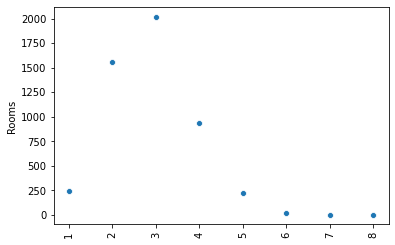

Graph for Price: Total = 1400


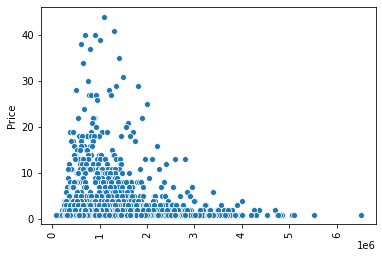

Graph for Distance: Total = 68


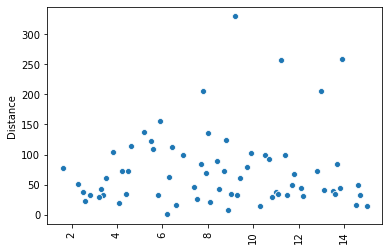

Graph for Postcode: Total = 70


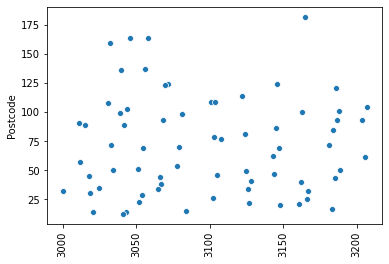

Graph for Bedroom2: Total = 10


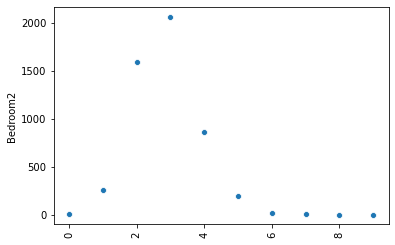

Graph for Bathroom: Total = 9


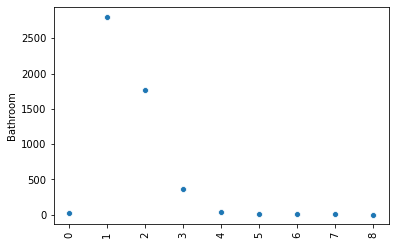

Graph for Car: Total = 9


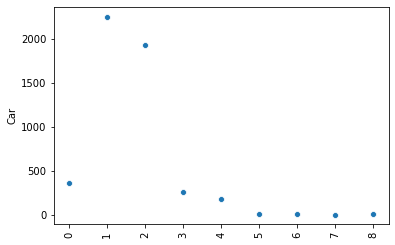

Graph for Landsize: Total = 1029


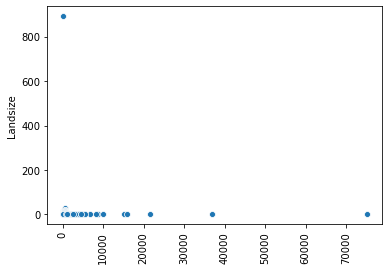

Graph for Buildingarea: Total = 387


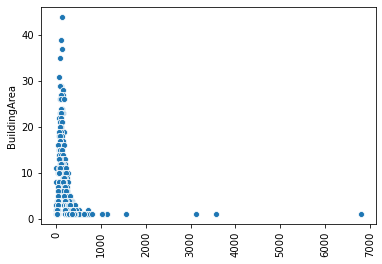

Graph for Yearbuilt: Total = 125


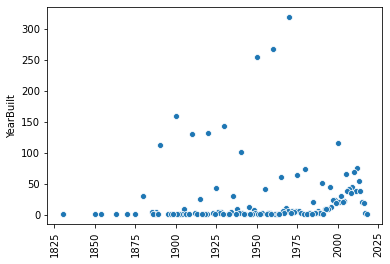

Graph for Councilarea: Total = 18


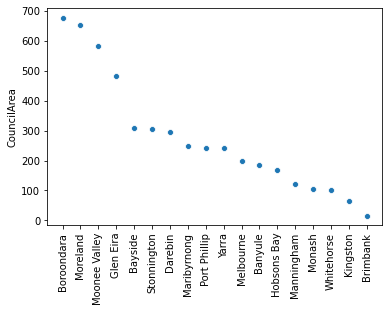

Graph for Propertycount: Total = 84


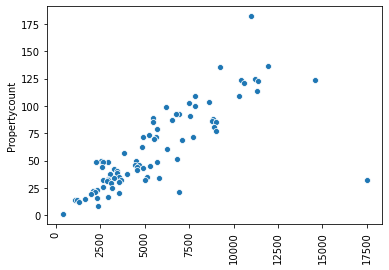

In [22]:
def plot_scatterplots():
    for i in columns_plot.columns:
        cat_num = columns_plot[i].value_counts()
        print('Graph for {}: Total = {}'.format(i.capitalize(), len(cat_num)))
        sns.scatterplot(x=cat_num.index, y=cat_num)
        plt.xticks(rotation=90)
        plt.show()
        
plot_scatterplots()   

**Interpretation of above information:**

Kita dapat menganalisa lebih lanjut dalam visualisasi outlier sebagai berikut:
    
1. Price - Is it safe to remove house price above 6 million?
2. Landsize - Is it safe to remove house that has over 10.000?
3. Buildingrea - Is it safe to remove house that is over 3000?

In [23]:
df2.loc[df2.Price > 6000000].shape

(4, 21)

In [24]:
df2.loc[df2.Landsize > 10000].shape

(4, 21)

In [25]:
df2.loc[df2.BuildingArea > 3000].shape

(1, 21)

From the analysis above, we could see outliers from each variable that follows from each assumptions.<br>
We could also see that outliers from each variable will not harm the dataset too much, since there are only 9 data that we will eliminate 

Therefore, we will remove the discovered outliers from above analysis.

In [26]:
df2_copy = df2.copy()

df2_copy = df2_copy[df2_copy.Price < 6000000]
df2_copy = df2_copy[df2_copy.Landsize < 10000]
df2_copy = df2_copy[df2_copy.BuildingArea < 3000]

In [27]:
df2_copy.shape

(4991, 21)

**Interpretation of above information:**

Kita dapat menyimpulkan dalam data cleaning sebagai berikut:

<br> **1. DELETING REDUNDANT COLUMNS** = **PASS**
<br> **2. HANDLING NAN VALUES FROM DATASET = PASS**
<br> **3. DATA TRANSFORMATION OF PRICE = PASS**
<br> **4. REMOVING OUTLIER = PASS**

## B. EDA (25 poin)

1. Jalankan Exploratory Data Analysis yang berkaitan dengan langkah pembuatan model (model building)!
2. Jenis plot yang wajib ada saat EDA yaitu Barplot, Boxplot, dan Histogram. Jenis plot lainnya boleh ditampilkan selama dijelaskan tujuan dan output-nya.
3. Jelaskan setiap langkah Anda dalam Exploratory Data Analysis dan jelaskan informasi dari plot yang Anda tampilkan!

**EXPLORING PRICE VARIABLE**

In [28]:
df2_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,4991.0,2.900421e+00,0.970250,1.00000,2.00000,3.0000,3.000000e+00,8.000000e+00
Price,4991.0,1.094471e+06,670283.865961,131000.00000,635000.00000,903000.0000,1.370000e+06,5.700000e+06
Distance,4991.0,8.882028e+00,4.369089,0.00000,5.90000,8.7000,1.140000e+01,4.590000e+01
Postcode,4991.0,3.096318e+03,67.908626,3000.00000,3042.00000,3079.0000,3.146000e+03,3.806000e+03
Bedroom2,4991.0,2.863955e+00,0.968091,0.00000,2.00000,3.0000,3.000000e+00,9.000000e+00
Bathroom,4991.0,1.563414e+00,0.711723,1.00000,1.00000,1.0000,2.000000e+00,8.000000e+00
Car,4991.0,1.540373e+00,0.927601,0.00000,1.00000,1.0000,2.000000e+00,1.000000e+01
Landsize,4991.0,4.329677e+02,580.638701,0.00000,138.00000,337.0000,6.130000e+02,9.838000e+03
BuildingArea,4991.0,1.401382e+02,83.247384,0.00000,89.00000,122.0000,1.690000e+02,1.561000e+03
YearBuilt,4991.0,1.961970e+03,37.567890,1830.00000,1933.50000,1965.0000,1.999000e+03,2.018000e+03


#### From this information we could take early inference that the average house from the dataset has:

1. At least 2 bedrooms and 1 bathrooms
2. Average building area 1400 m
3. Average built in the year of 1961
4. Average price of 1 million USD
5. with an average 7 houses in neighborhood

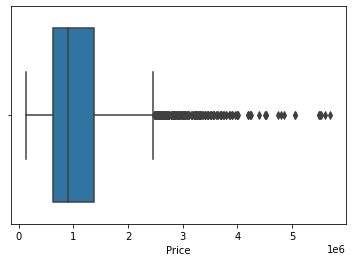

In [29]:
sns.boxplot(df2_copy["Price"])

**Interpretation of above information:**

1. Since data is not normally distributed, house price that is above 2.5 million USD is considered as a potential outliers (indicated by black dots on the right)
2. The line in the middle of blue box is a median. The median of this data is 903000
3. The minimum value of the price is 131000
4. The maximum value of the price is 5.70 million USD
5. The average of house price is 1 million USD

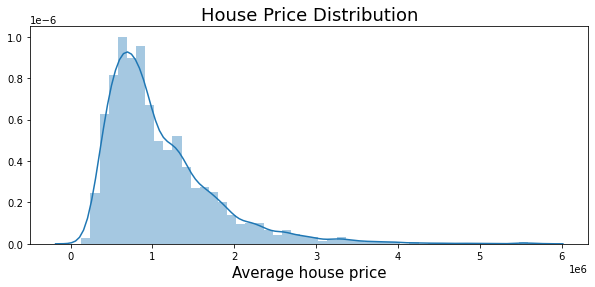

In [30]:
plt.figure(figsize=(10,4))
plt.title("House Price Distribution", size=18)
sns.distplot(df2_copy["Price"])

plt.xlabel('Average house price', size=15)
plt.show()

**Interpretation of above information:**

1. This information shows that the variable price has positive skewness. 
2. This indicates that most of the population does not have high buying power in purchasing house. 
3. That is, this implies that majorities of the population could only afford mid to low price, while few of the population could afford higher house price.

In [31]:
df2_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4991 entries, 1 to 9670
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         4991 non-null   object 
 1   Address        4991 non-null   object 
 2   Rooms          4991 non-null   int64  
 3   Type           4991 non-null   object 
 4   Price          4991 non-null   int64  
 5   Method         4991 non-null   object 
 6   SellerG        4991 non-null   object 
 7   Date           4991 non-null   object 
 8   Distance       4991 non-null   float64
 9   Postcode       4991 non-null   float64
 10  Bedroom2       4991 non-null   float64
 11  Bathroom       4991 non-null   float64
 12  Car            4991 non-null   float64
 13  Landsize       4991 non-null   float64
 14  BuildingArea   4991 non-null   float64
 15  YearBuilt      4991 non-null   float64
 16  CouncilArea    4991 non-null   object 
 17  Lattitude      4991 non-null   float64
 18  Longtitu

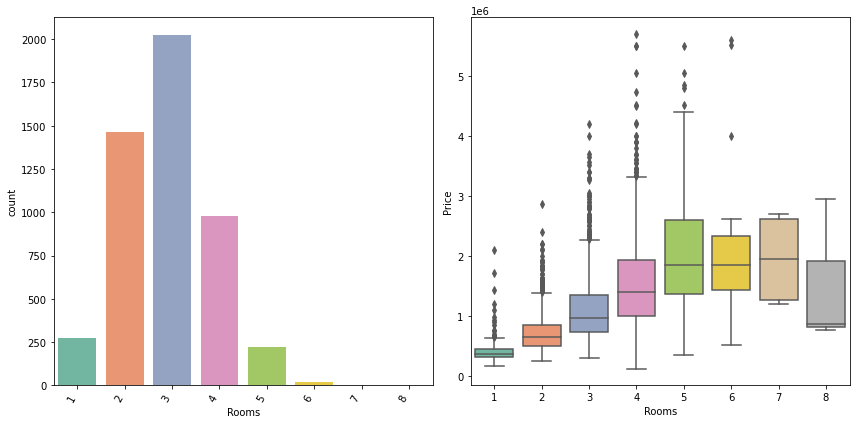

In [32]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

ax = sns.countplot(x='Rooms',data=df2_copy, palette='Set2', ax=axs[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
sns.boxplot(y='Price',x='Rooms',data=df2_copy, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

**Interpretation of above information:**

1. There is an indication that shows that **more rooms** in a house will result a **higher house price**
2. Most house were sold with 3 rooms, followed by 2 rooms, and 4 rooms.

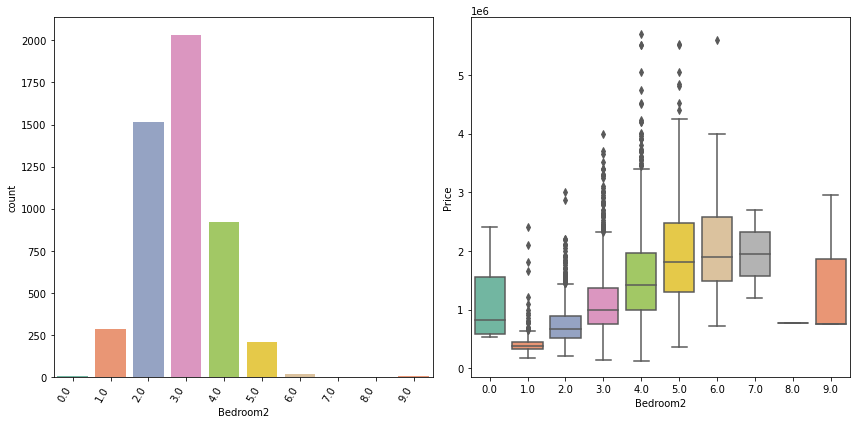

In [33]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

ax = sns.countplot(x='Bedroom2',data=df2_copy, palette='Set2', ax=axs[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
sns.boxplot(y='Price',x='Bedroom2',data=df2_copy, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

**Interpretation of above information:**

1. There is an indication that shows that **more bedrooms** in a house will result a **higher house price**
2. Most house were sold with 3 bedrooms, followed by 2 bedrooms.

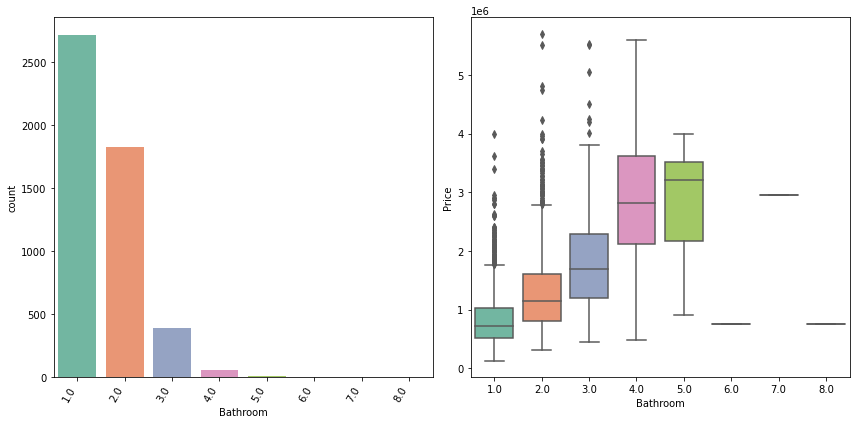

In [34]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

ax = sns.countplot(x='Bathroom',data=df2_copy, palette='Set2', ax=axs[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
sns.boxplot(y='Price',x='Bathroom',data=df2_copy, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

**Interpretation of above information:**

1. There is an indication that shows that **more bathrooms** in a house will result a **higher house price**
2. Most house were sold with 1 bathrooms, followed by 2 bathrooms.

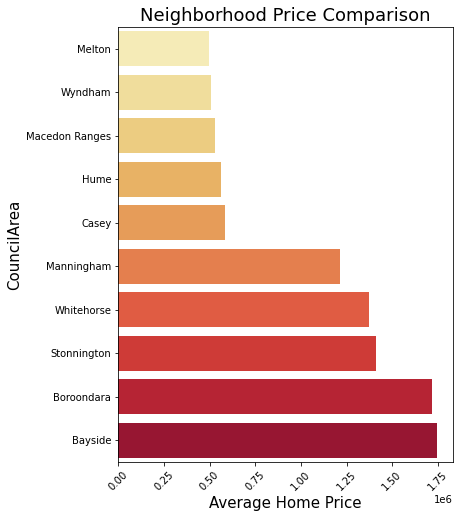

In [35]:
# Create a dataframe for the top 5/bottom 5 zipcodes in terms of average price. Then, combine the dataframes. 

pd.options.display.float_format = "{:.2f}".format # Round to 2 decimal places

top = df2_copy.groupby('CouncilArea')['Price'].mean().reset_index().sort_values('Price', ascending=False)[:5]
bot = df2_copy.groupby('CouncilArea')['Price'].mean().reset_index().sort_values('Price', ascending=False)[-5:]
combined = pd.concat([top, bot])
combined.sort_values('Price', ascending=True, inplace=True)

plt.figure(figsize=(6,8))

sns.barplot(x='Price', y='CouncilArea' , order = combined['CouncilArea'], orient='h', data=combined, palette='YlOrRd')

plt.title('Neighborhood Price Comparison', size=18)
plt.ylabel('CouncilArea', size=15)
plt.xlabel('Average Home Price', size=15)
plt.xticks(rotation=45)

plt.show()

**Interpretation of above information:**

1. We could see the average house price from Concil Area, where house within Bayside area has the most expensive average price 
2. house within Melton Area has the cheapest average price.
3. In other words, customers who live in Bayside is probably has more income, and lives in a better area.

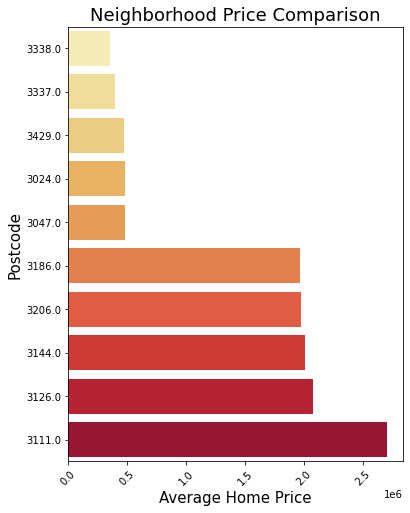

In [36]:
# Create a dataframe for the top 5/bottom 5 zipcodes in terms of average price. Then, combine the dataframes. 

pd.options.display.float_format = "{:.2f}".format # Round to 2 decimal places

top = df2_copy.groupby('Postcode')['Price'].mean().reset_index().sort_values('Price', ascending=False)[:5]
bot = df2_copy.groupby('Postcode')['Price'].mean().reset_index().sort_values('Price', ascending=False)[-5:]
combined = pd.concat([top, bot])
combined.sort_values('Price', ascending=True, inplace=True)

plt.figure(figsize=(6,8))

sns.barplot(x='Price', y='Postcode' , order = combined['Postcode'], orient='h', data=combined, palette='YlOrRd')

plt.title('Neighborhood Price Comparison', size=18)
plt.ylabel('Postcode', size=15)
plt.xlabel('Average Home Price', size=15)
plt.xticks(rotation=45)

plt.show()

**Interpretation of above information:**

1. We could see the average house price from PostCode area, where house within 3111 area has the most expensive average price 
2. House within 3338 PostCode Area has the cheapest average price.
3. In other words, customers who live in 3111 Area is probably has more income, and lives in a better area.

No handles with labels found to put in legend.


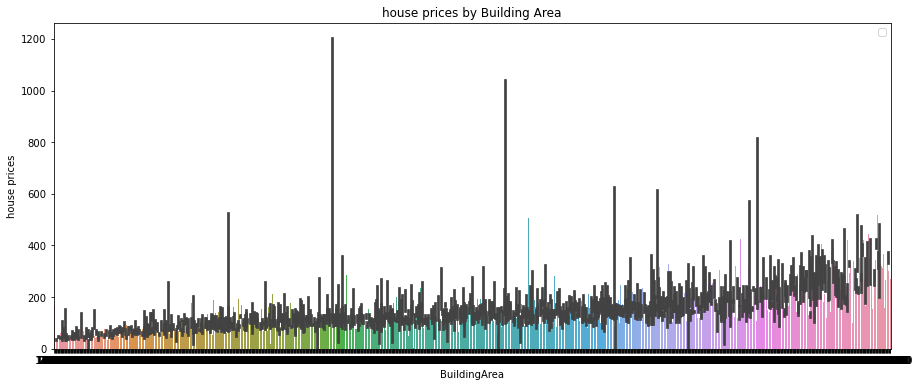

In [37]:
plt.figure(figsize=(15,6))
sns.barplot(data=df2_copy,x="Price", y="BuildingArea")
plt.title("house prices by Building Area")
plt.xlabel('BuildingArea')
plt.ylabel('house prices')
plt.legend()

**Interpretation of above information:**

1. The **bigger the building area** will gives **higher house price**

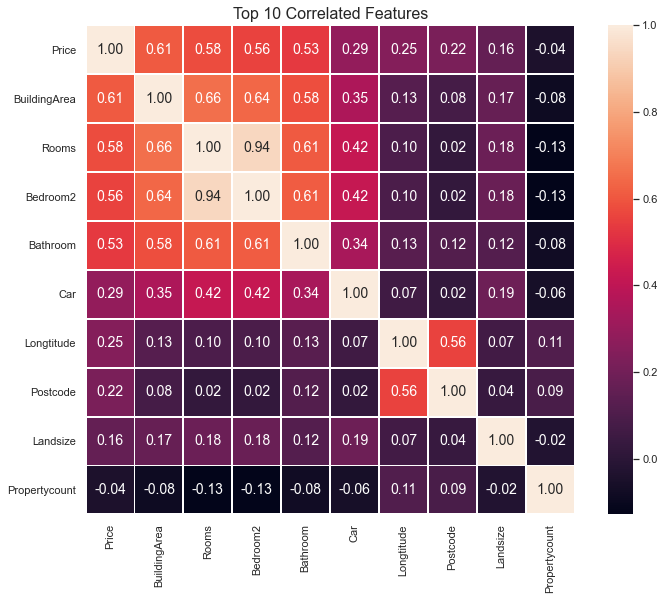

In [40]:
feats = df2_copy.corr().nlargest(10,"Price")["Price"].index
cm = np.corrcoef(df2_copy[feats].values.T)
plt.figure(figsize=(12,9))
plt.title("Top 10 Correlated Features",fontsize=16)
sns.heatmap(cm,annot=True,fmt=".2f",linewidths=1.0,square=True,xticklabels=feats,yticklabels=feats,annot_kws={"fontsize":14})
plt.show()

From this correlation infromation, we could infer some initial assumption that price has strong correlation (>0.6) with:
1. BuildingArea
2. Rooms
3. Bedrooms
4. Bathrooms

In any case, it is a logical and common sense conclusion to grasp the idea that a size of property would positively correlated with the price

## C. Model Building & Hyper-parameter Tuning (30 poin)

1. Setelah menjalankan EDA, pilih model ML terbaik untuk memprediksi harga rumah, beri alasan pemilihan!
2. Jalankan cross validation/K-Fold serta cek apakah model ML yang Anda buat tergolong underfitting atau overfitting.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import scorer
from sklearn.metrics import make_scorer

#Importing Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

#Importing ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [42]:
df2_copy.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [43]:
df2_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4991 entries, 1 to 9670
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         4991 non-null   object 
 1   Address        4991 non-null   object 
 2   Rooms          4991 non-null   int64  
 3   Type           4991 non-null   object 
 4   Price          4991 non-null   int64  
 5   Method         4991 non-null   object 
 6   SellerG        4991 non-null   object 
 7   Date           4991 non-null   object 
 8   Distance       4991 non-null   float64
 9   Postcode       4991 non-null   float64
 10  Bedroom2       4991 non-null   float64
 11  Bathroom       4991 non-null   float64
 12  Car            4991 non-null   float64
 13  Landsize       4991 non-null   float64
 14  BuildingArea   4991 non-null   float64
 15  YearBuilt      4991 non-null   float64
 16  CouncilArea    4991 non-null   object 
 17  Lattitude      4991 non-null   float64
 18  Longtitu

From this information, we will do the following activities:

1. Drop categorical variables
2. Drop datetime64 variable
3. Lattitude and Longitude (This is treated as categorical)

Since it will convolute the model

In [44]:
# Preparing Data and Target dataframe
data = df2_copy.drop(columns=['Suburb', 
                              'Address',
                              'Price',
                              'Type', 
                              'Method', 
                              'SellerG', 
                              'Date', 
                              'CouncilArea', 
                              'Regionname', 
                              'Lattitude', 
                              'Longtitude'])
data = pd.get_dummies(data, drop_first=True)
target = df2_copy['Price']

# Data splitting for Train, Validation and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=18)

#_____ Checking shape ____
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3493, 10) (3493,)
(1498, 10) (1498,)


In [45]:
X_train.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount'],
      dtype='object')

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 5606 to 6236
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          3493 non-null   int64  
 1   Distance       3493 non-null   float64
 2   Postcode       3493 non-null   float64
 3   Bedroom2       3493 non-null   float64
 4   Bathroom       3493 non-null   float64
 5   Car            3493 non-null   float64
 6   Landsize       3493 non-null   float64
 7   BuildingArea   3493 non-null   float64
 8   YearBuilt      3493 non-null   float64
 9   Propertycount  3493 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 300.2 KB


### Initial Regression Machine Learning Model Evaluation

**Model 1 RandomForestRegressor**

In [47]:
model_RFR = RandomForestRegressor(n_estimators=100)
model_RFR.fit(X_train, y_train)

yhat_pred_RFR = model_RFR.predict(X_test)

cross_val_RFR = round(np.mean(cross_val_score(model_RFR,X_train,y_train)),4)
R2_RFR = round(r2_score(y_test, yhat_pred_RFR),4)
MAE_RFR = int(mean_absolute_error(y_test,yhat_pred_RFR))

**Model 2 XGB Regressor**

In [48]:
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, y_train)

yhat_pred_xgboost = model_xgboost.predict(X_test)

cross_val_xgboost = round(np.mean(cross_val_score(model_xgboost,X_train,y_train)),4)
R2_xgboost = round(r2_score(y_test, yhat_pred_xgboost),4)
MAE_xgboost = int(mean_absolute_error(y_test,yhat_pred_xgboost))

**Model 3 Extra Trees Regressor**

In [49]:
model_ETR = ExtraTreesRegressor()
model_ETR.fit(X_train, y_train)

yhat_pred_ETR = model_ETR.predict(X_test)

cross_val_ETR = round(np.mean(cross_val_score(model_ETR,X_train,y_train)),4)
R2_ETR = round(r2_score(y_test, yhat_pred_ETR),4)
MAE_ETR = int(mean_absolute_error(y_test,yhat_pred_ETR))

**Model 4 Decision Tree Regression**

In [50]:
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train, y_train)

yhat_pred_DTR = model_DTR.predict(X_test)

cross_val_DTR = round(np.mean(cross_val_score(model_DTR,X_train,y_train)),4)
R2_DTR = round(r2_score(y_test, yhat_pred_DTR),4)
MAE_DTR = int(mean_absolute_error(y_test,yhat_pred_DTR))

**Model 5 Gradient Boosting Regression**

In [51]:
model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train, y_train)

yhat_pred_GBR = model_GBR.predict(X_test)

cross_val_GBR = round(np.mean(cross_val_score(model_GBR,X_train,y_train)),4)
R2_GBR = round(r2_score(y_test, yhat_pred_GBR),4)
MAE_GBR = int(mean_absolute_error(y_test,yhat_pred_GBR))

**Model 6 LGBM Regression**

In [52]:
model_LGBM = LGBMRegressor()
model_LGBM.fit(X_train, y_train)

yhat_pred_LGBM = model_LGBM.predict(X_test)

cross_val_LGBM = round(np.mean(cross_val_score(model_LGBM,X_train,y_train)),4)
R2_LGBM = round(r2_score(y_test, yhat_pred_LGBM),4)
MAE_LGBM = int(mean_absolute_error(y_test,yhat_pred_LGBM))

**Model Evaluation**

In [53]:
models = pd.DataFrame({
    'Model': ['Random Forest Regression', 
              'XGBOOST Regression', 
              'ExtraTreesRegressor', 
              'Decision Tree Regressor', 
              'Gradient Boosting Regressor',
              'LGBM Regressor'],
    'Mean Absolute Error': [MAE_RFR, 
                            MAE_xgboost, 
                            MAE_ETR, 
                            MAE_DTR, 
                            MAE_GBR, 
                            MAE_LGBM],    
    'R2 Score': [R2_RFR, 
                 R2_xgboost, 
                 R2_ETR, 
                 R2_DTR, 
                 R2_GBR, 
                 R2_LGBM],    
    'Cross Validation Score': [cross_val_RFR, 
                               cross_val_xgboost, 
                               cross_val_ETR, 
                               cross_val_DTR,  
                               cross_val_GBR,
                               cross_val_LGBM]})

models.sort_values(by='Cross Validation Score', ascending=False)

,Model,Mean Absolute Error,R2 Score,Cross Validation Score
5,LGBM Regressor,176708,0.82,0.82
1,XGBOOST Regression,186152,0.80,0.81
4,Gradient Boosting Regressor,194729,0.78,0.81
0,Random Forest Regression,186542,0.79,0.80
2,ExtraTreesRegressor,189917,0.80,0.80
3,Decision Tree Regressor,258202,0.62,0.60


From the analysis above, we could see that **LGBM** is the best model, followed by **XGBOOST Regressor.**

The following sections would discuss the hyperparameter from **the best two models**, which are **LGBM Regressor** and **XGB Regressor**. The other 5 models are not tuned further, since their score is below than these two models, and some of them are not satisfactory enough to be used as a model prediction.

# Tuning Model - LGBM

In [54]:
# Model Tuning
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3],
    'colsample_bytree': [0.4, 0.7, 1],
    'n_estimators': [300, 500],
    'bootstrap': [True, False],
    'min_samples_split' : [2, 5],
    'max_bin': [100, 200],
    'num_iterations': [500, 1000]
}

LGBM_model = LGBMRegressor(random_state=42)
LGBM_cv_model = GridSearchCV(
                estimator= LGBM_model, 
                param_grid=param_grid,
                scoring='neg_mean_absolute_error',
                cv=5, 
                n_jobs=-1, 
                verbose=2
)

LGBM_cv_model.fit(X_train, y_train)
print("Best Params: ", LGBM_cv_model.best_params_)
print("Best Score : ", LGBM_cv_model.best_score_)

LGBM_y_pred = LGBM_cv_model.predict(X_test)

r_square = metrics.r2_score(y_test, LGBM_y_pred)
mse = metrics.mean_squared_error(y_test, LGBM_y_pred)
mae = metrics.median_absolute_error(y_test, LGBM_y_pred)
ev = metrics.explained_variance_score(y_test, LGBM_y_pred)

print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   19.4s


[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: min_samples_split
Best Params:  {'bootstrap': True, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_bin': 100, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300, 'num_iterations': 500}
Best Score :  -174028.5622183791
R Square               :  82.5531093090884
Mean Squared Error     :  82788381162.49806
Root Mean Squared Error:  287729.70156467694
Median Absolute Error  :  110604.08173836951
Explained Variance     :  0.8257445569149874


[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   28.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



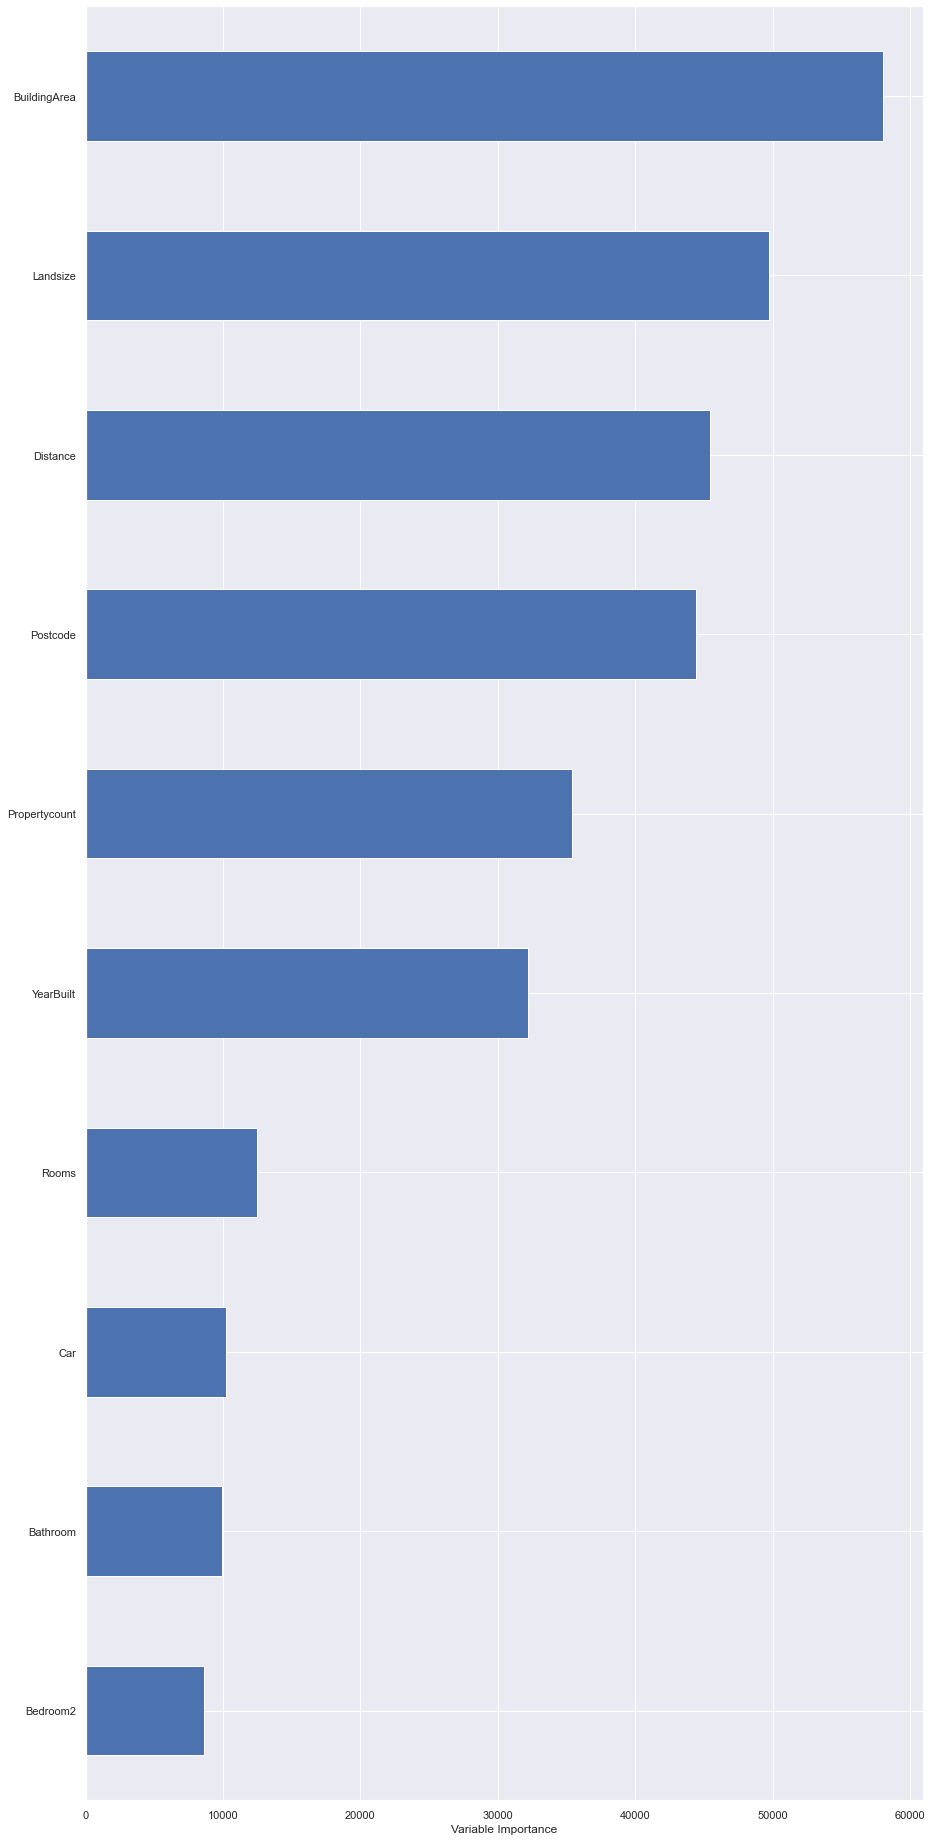

In [56]:
columns = ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']

LGBM_Importance = pd.DataFrame({
    'Importance': LGBM_cv_model.best_estimator_.feature_importances_*100}, index=columns)
LGBM_Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="b")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None

In [57]:
LGBM_ypred_train = LGBM_cv_model.predict(X_train)

LGBM_r_square_train = metrics.r2_score(y_train, LGBM_ypred_train)
LGBM_mse_train = metrics.mean_squared_error(y_train, LGBM_ypred_train)
LGBM_mae_train = metrics.median_absolute_error(y_train, LGBM_ypred_train)
LGBM_ev_train = metrics.explained_variance_score(y_train, LGBM_ypred_train)

print("R Square               : ", LGBM_r_square_train*100)
print("Mean Squared Error     : ", LGBM_mse_train)
print("Root Mean Squared Error: ", LGBM_mse_train**(1/2))
print("Median Absolute Error  : ", LGBM_mae_train)
print("Explained Variance     : ", LGBM_ev_train)

R Square               :  90.92668403121135
Mean Squared Error     :  39768962013.20433
Root Mean Squared Error:  199421.56857572935
Median Absolute Error  :  89943.10317239002
Explained Variance     :  0.9092668403121136


In [58]:
LGBM_ypred_test = LGBM_cv_model.predict(X_test)

LGBM_r_square_test = metrics.r2_score(y_test, LGBM_ypred_test)
LGBM_mse_test = metrics.mean_squared_error(y_test, LGBM_ypred_test)
LGBM_mae_test = metrics.median_absolute_error(y_test, LGBM_ypred_test)
LGBM_ev_test = metrics.explained_variance_score(y_test, LGBM_ypred_test)

print("R Square               : ", LGBM_r_square_test*100)
print("Mean Squared Error     : ", LGBM_mse_test)
print("Root Mean Squared Error: ", LGBM_mse_test**(1/2))
print("Median Absolute Error  : ", LGBM_mae_test)
print("Explained Variance     : ", LGBM_ev_test)

R Square               :  82.5531093090884
Mean Squared Error     :  82788381162.49806
Root Mean Squared Error:  287729.70156467694
Median Absolute Error  :  110604.08173836951
Explained Variance     :  0.8257445569149874


In [59]:
models = pd.DataFrame({
    'Model': ['Train CV Score', 'Test CV Score'],
    'R Square (R2)': [LGBM_r_square_train, LGBM_r_square_test],    
    'Mean Squared Error (MSE)': [LGBM_mse_train, LGBM_mse_test],    
    'Root Mean Squared Error (RMSE)': [LGBM_mse_train**(1/2), LGBM_mse_test**(1/2)],
    'Median Absolute Error (MAE)': [LGBM_mae_train, LGBM_mae_test],  
    'Explained Variance (EV)': [LGBM_ev_train, LGBM_ev_test], 
})

models.sort_values(by='Root Mean Squared Error (RMSE)', ascending=True).T

,0,1
Model,Train CV Score,Test CV Score
R Square (R2),0.91,0.83
Mean Squared Error (MSE),39768962013.20,82788381162.50
Root Mean Squared Error (RMSE),199421.57,287729.70
Median Absolute Error (MAE),89943.10,110604.08
Explained Variance (EV),0.91,0.83


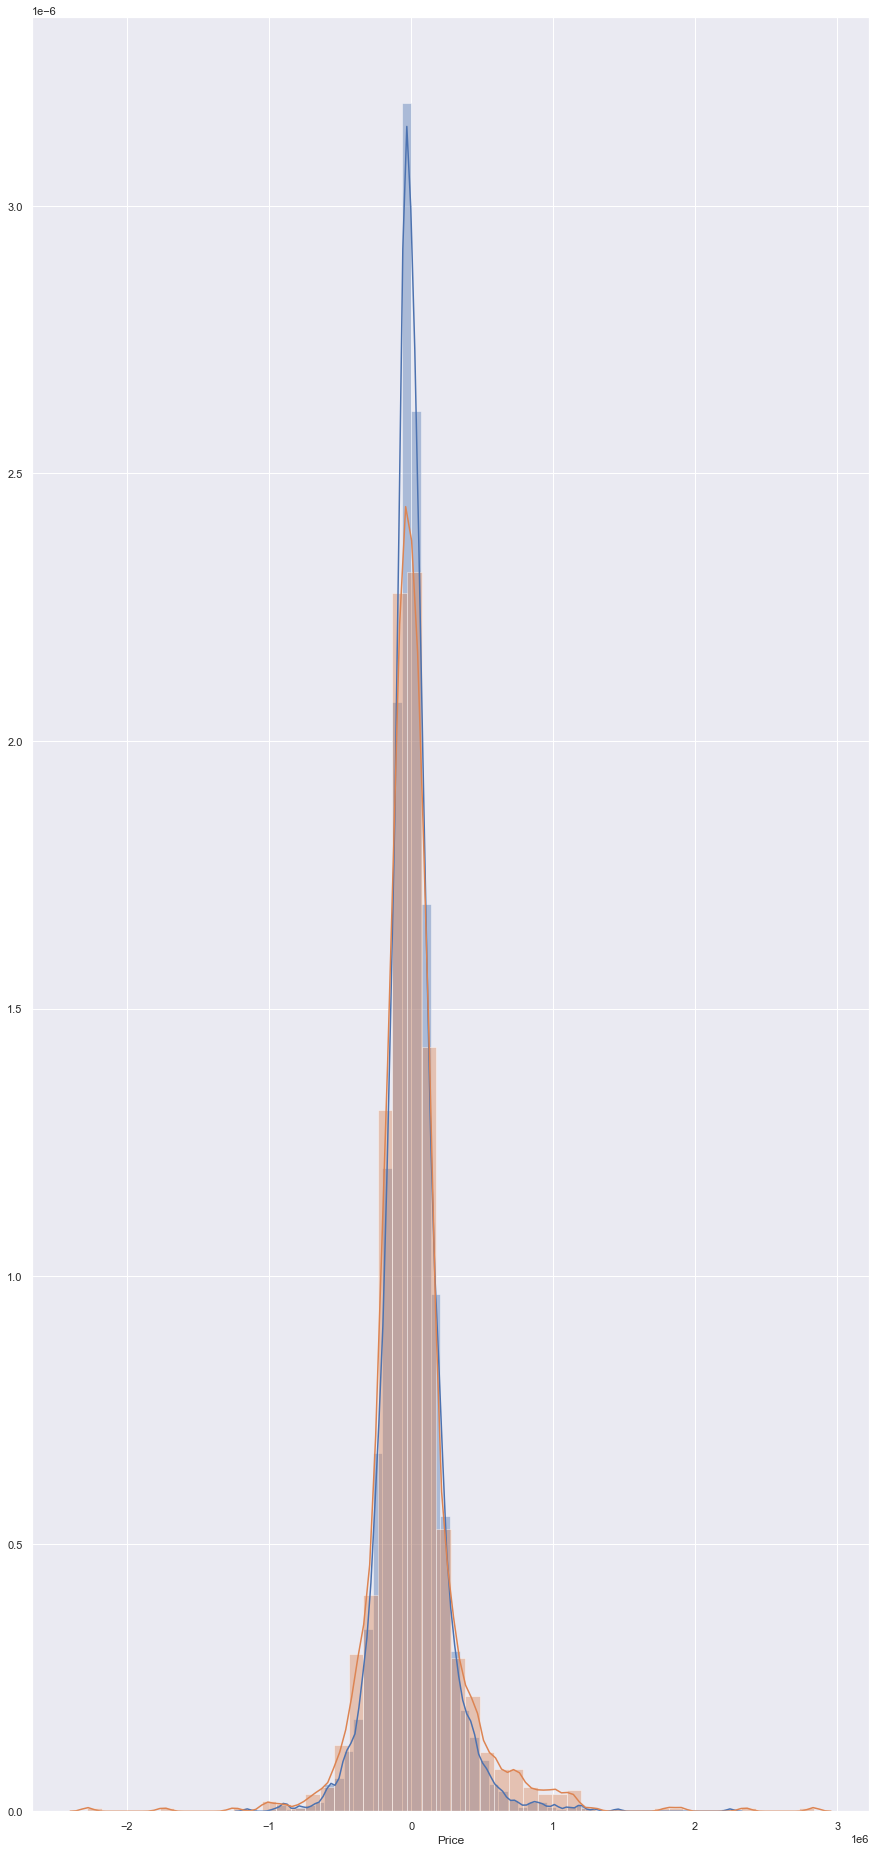

In [60]:
sns.distplot(y_train - LGBM_ypred_train)
sns.distplot(y_test - LGBM_ypred_test)

**Basic Evaluation of LGBM Regressor Model**

1. There is an overfitting in RMSE score
2. MAE score is relative fit
3. The error distribution between train and test does not vary too much

# Tuning Model - XGBoost

In [61]:
# Model Tuning
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3],
    'colsample_bytree': [0.4, 0.7, 1],
    'n_estimators': [300, 500],
    'bootstrap': [True, False],
    'min_samples_split' : [2, 5],
    'max_bin': [100, 200],
    'num_iterations': [500]
}

XGB_model = XGBRegressor(random_state=42)
XGB_cv_model = GridSearchCV(
    estimator=XGB_model, 
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5, 
    n_jobs=-1, 
    verbose=2)

XGB_cv_model.fit(X_train, y_train)
print("Best Params: ", XGB_cv_model.best_params_)
print("Best Score : ", XGB_cv_model.best_score_)

XGB_y_pred = XGB_cv_model.predict(X_test)

r_square = metrics.r2_score(y_test, XGB_y_pred)
mse = metrics.mean_squared_error(y_test, XGB_y_pred)
mae = metrics.median_absolute_error(y_test, XGB_y_pred)
ev = metrics.explained_variance_score(y_test, XGB_y_pred)

print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   29.8s finished


[16:41:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { bootstrap, min_samples_split, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best Params:  {'bootstrap': True, 'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_bin': 100, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500, 'num_iterations': 500}
Best Score :  -173880.08857351038
R Square               :  82.259731155924
Mean Squared Error     :  84180509009.18518
Root Mean Squared Error:  290138.775432008
Median Absolute Error  :  113761.6875
Explained Variance     :  0.8227157224856173


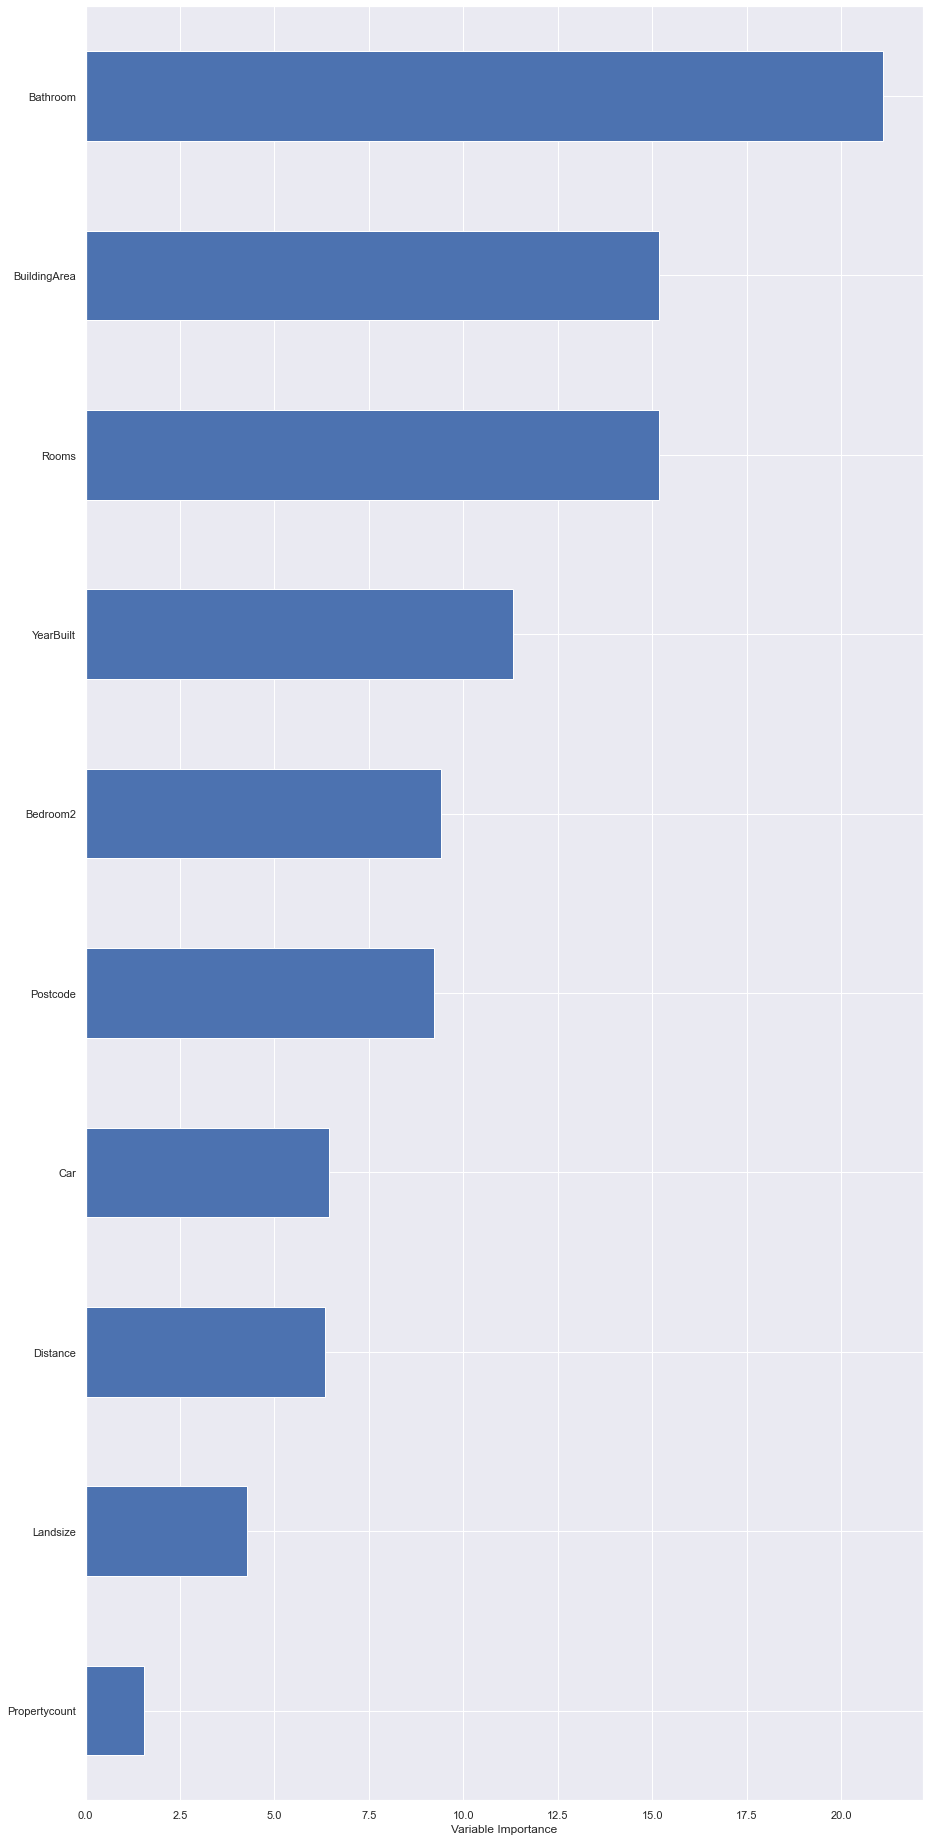

In [62]:
columns = ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']

XGB_Importance = pd.DataFrame({
    'Importance': XGB_cv_model.best_estimator_.feature_importances_*100}, index=columns)
XGB_Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="b")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None

In [63]:
XGB_ypred_train = XGB_cv_model.predict(X_train)

XGB_r_square_train = metrics.r2_score(y_train, XGB_ypred_train)
XGB_mse_train = metrics.mean_squared_error(y_train, XGB_ypred_train)
XGB_mae_train = metrics.median_absolute_error(y_train, XGB_ypred_train)
XGB_ev_train = metrics.explained_variance_score(y_train, XGB_ypred_train)

print("R Square               : ", XGB_r_square_train*100)
print("Mean Squared Error     : ", XGB_mse_train)
print("Root Mean Squared Error: ", XGB_mse_train**(1/2))
print("Median Absolute Error  : ", XGB_mae_train)
print("Explained Variance     : ", XGB_ev_train)

R Square               :  91.73788527860233
Mean Squared Error     :  36213411682.594284
Root Mean Squared Error:  190298.2177598999
Median Absolute Error  :  89634.875
Explained Variance     :  0.9173788532897575


In [64]:
XGB_ypred_test = XGB_cv_model.predict(X_test)

XGB_r_square_test = metrics.r2_score(y_test, XGB_ypred_test)
XGB_mse_test = metrics.mean_squared_error(y_test, XGB_ypred_test)
XGB_mae_test = metrics.median_absolute_error(y_test, XGB_ypred_test)
XGB_ev_test = metrics.explained_variance_score(y_test, XGB_ypred_test)

print("R Square               : ", XGB_r_square_test*100)
print("Mean Squared Error     : ", XGB_mse_test)
print("Root Mean Squared Error: ", XGB_mse_test**(1/2))
print("Median Absolute Error  : ", XGB_mae_test)
print("Explained Variance     : ", XGB_ev_test)

R Square               :  82.259731155924
Mean Squared Error     :  84180509009.18518
Root Mean Squared Error:  290138.775432008
Median Absolute Error  :  113761.6875
Explained Variance     :  0.8227157224856173


In [65]:
models = pd.DataFrame({
    'Model': ['Train CV Score', 'Test CV Score'],
    'R Square (R2)': [XGB_r_square_train, XGB_r_square_test],    
    'Mean Squared Error (MSE)': [XGB_mse_train, XGB_mse_test],    
    'Root Mean Squared Error (RMSE)': [XGB_mse_train**(1/2), XGB_mse_test**(1/2)],
    'Median Absolute Error (MAE)': [XGB_mae_train, XGB_mae_test],  
    'Explained Variance (EV)': [XGB_ev_train, XGB_ev_test], 
})

models.sort_values(by='Root Mean Squared Error (RMSE)', ascending=True).T

,0,1
Model,Train CV Score,Test CV Score
R Square (R2),0.92,0.82
Mean Squared Error (MSE),36213411682.59,84180509009.19
Root Mean Squared Error (RMSE),190298.22,290138.78
Median Absolute Error (MAE),89634.88,113761.69
Explained Variance (EV),0.92,0.82


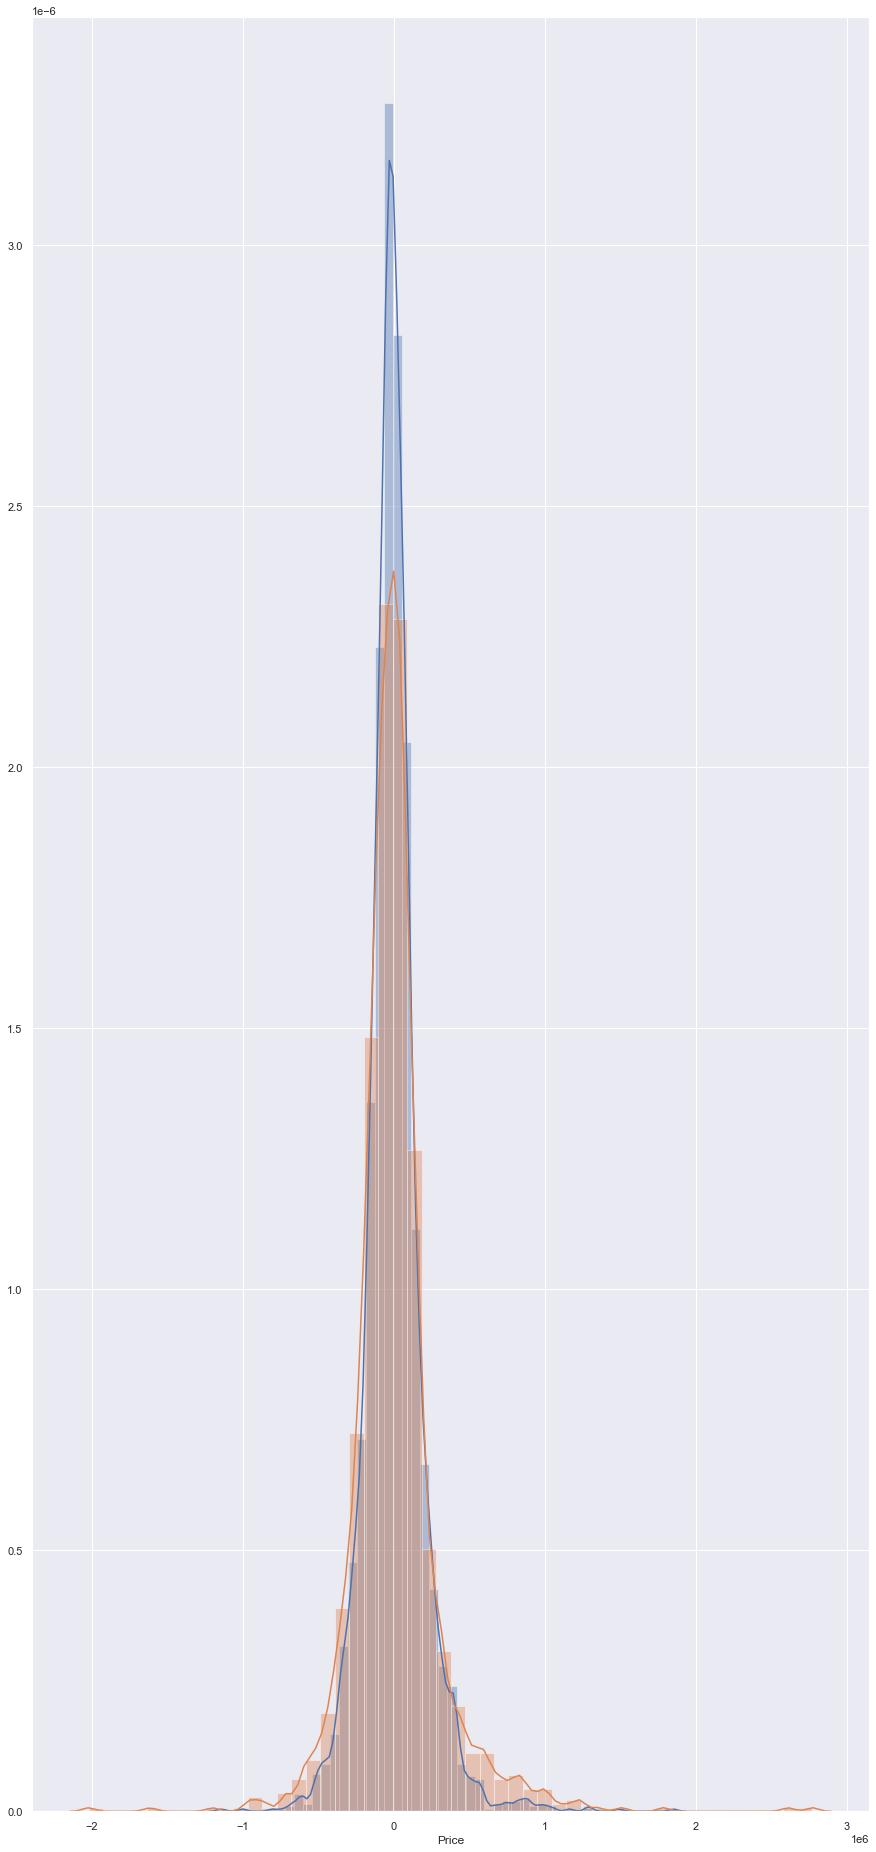

In [66]:
sns.distplot(y_train - XGB_ypred_train)

sns.distplot(y_test - XGB_ypred_test)

**Basic Evaluation of XGB Regressor Model**

1. There is an overfitting in RMSE score
2. MAE score is quite overfit
3. The error distribution between train and test does not vary too much

# D. Model Evaluation (30 poin)

1. Pilih 1 Model Evaluation untuk menilai performa Model ML yang Anda buat, beri alasan pemilihan!

2. Tingkatkan performa model ML sesuai jenis Model Evaluation yang Anda pilih. Jelaskan setiap langkah Anda dalam Model Building & Hyper-parameter Tuning!

3. Beri penjelasan setiap angka (output) dari Model Evaluation serta pengaruhnya pada keuntungan/kerugian perusahaan real estate!

# HYPERPARAMETER EXPLANATION

**Di dalam Hyperparameter Tuning sebelumnya, model LGBM menggunakan hyperparameter:**

1. learning_rate': [0.1, 0.01],
2. max_depth': [3],
3. colsample_bytree': [0.4, 0.7, 1],
4. n_estimators': [300, 500],
5. 'bootstrap': [True, False],
6. 'min_samples_split' : [2, 5],
7. 'max_bin': [100, 200],

**Alasan dari pemilihan hyperparameter:**

1. Menggunakan learning_rate yang kecil dengan with num_iterations yang besar untuk meningkatkan akurasi
2. Menggunakan max_bin untuk meningkatkan akurasi
3. Menggunakan max_depth untuk menghindari growing deep tree
4. Menggunakan colsample_bytree untuk membuat sample ratio dari columns ketika membangun setiap tree.


### MODEL EVALUATION & SUMMARY

There are three metrics which are generally used for evaluation of Regression problems (like Linear Regression, Decision Tree Regression, Random Forest Regression etc.):

1. Mean Absolute Error (MAE): This measures the absolute average distance between the real data and the predicted data, but it fails to punish large errors in prediction.
2. Mean Square Error (MSE): This measures the squared average distance between the real data and the predicted data. Here, larger errors are well noted (better than MAE). But the disadvantage is that it also squares up the units of data as well. So, evaluation with different units is not at all justified.
3. Root Mean Squared Error (RMSE): This is actually the square root of MSE. Also, this metrics solves the problem of squaring the units.

According to JJ[1] and Sab[2], using MAE over MSE and RMSE is more advantageous. MAE is the most intuitive of them all. The name in itself is pretty good at telling us what’s going on. RMSE does not describe average error alone and has other implications that are more difficult to tease out and understand.

[1] https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d <br>
[2] http://zerospectrum.com/2019/06/02/mae-vs-mse-vs-rmse/

In [67]:
price_x = df2_copy['Price'].mean()

print('Average Price of Dataset = ', price_x)

print('XGB MAE Score=', (XGB_mae_test))
print('LGBM MAE Score=', (LGBM_mae_test))

print('XGB MAE % Difference with Average Price =', ((XGB_mae_test/price_x)*100))
print('LGBM MAE % Difference with Average Price =', ((LGBM_mae_test/price_x)*100))

Average Price of Dataset =  1094470.9873772792
XGB MAE Score= 113761.6875
LGBM MAE Score= 110604.08173836951
XGB MAE % Difference with Average Price = 10.394216823655718
LGBM MAE % Difference with Average Price = 10.105711619036526


**MAE Evaluation**

1. From this information, we could see that LGBM model has the best MAE score, because it only shows 10.105% difference from average price of the house
2. Meanwhile, XGB model has the biggest MAE score of 10.39% difference from the average price in the dataset.

In [68]:
RMSE_XGB_train = (XGB_mse_train**(1/2))
RMSE_XGB_test = (XGB_mse_test**(1/2))
RMSE_LGBM_train = (LGBM_mse_train**(1/2))
RMSE_LGBM_test = (LGBM_mse_test**(1/2))


models = pd.DataFrame({
    'Model': ['XGB  Train ', 'XGB  Test', 'LGBM Train', 'LGBM Test'],
    'R Square (R2)': [XGB_r_square_train, XGB_r_square_test, 
                      LGBM_r_square_train, LGBM_r_square_test],    
    'Mean Squared Error (MSE)': [XGB_mse_train, XGB_mse_test, 
                                 LGBM_mse_train, LGBM_mse_test],   
    'Root Mean Squared Error (RMSE)': [RMSE_XGB_train, RMSE_XGB_test, 
                                       RMSE_LGBM_train, RMSE_LGBM_test],
    'Median Absolute Error (MAE)': [XGB_mae_train, XGB_mae_test, 
                                    LGBM_mae_train, LGBM_mae_test],  
    'Explained Variance (EV)': [XGB_ev_train, XGB_ev_test, 
                                LGBM_ev_train, LGBM_ev_test], 
})

models.T

,0,1,2,3
Model,XGB Train,XGB Test,LGBM Train,LGBM Test
R Square (R2),0.92,0.82,0.91,0.83
Mean Squared Error (MSE),36213411682.59,84180509009.19,39768962013.20,82788381162.50
Root Mean Squared Error (RMSE),190298.22,290138.78,199421.57,287729.70
Median Absolute Error (MAE),89634.88,113761.69,89943.10,110604.08
Explained Variance (EV),0.92,0.82,0.91,0.83


**Model Score Summary**

The information above summarize data from previous model analysis. Further analysis is needed and would be discussed in following sections.

In [69]:
RMSE_XGB_train = (XGB_mse_train**(1/2))
RMSE_XGB_test = (XGB_mse_test**(1/2))
RMSE_LGBM_train = (LGBM_mse_train**(1/2))
RMSE_LGBM_test = (LGBM_mse_test**(1/2))


models = pd.DataFrame({
    'Model': ['XGB Difference Score', 'LGBM Difference Score' ],
    'R Square (R2)': [((XGB_r_square_train-XGB_r_square_test)), 
                      ((LGBM_r_square_train-LGBM_r_square_test))],    
    'Mean Squared Error (MSE)': [((XGB_mse_train-XGB_mse_test)), 
                                 ((LGBM_mse_train-LGBM_mse_test))],   
    'Root Mean Squared Error (RMSE)': [((RMSE_XGB_train-RMSE_XGB_test)), 
                                       ((RMSE_LGBM_train-RMSE_LGBM_test))],
    'Median Absolute Error (MAE)': [((XGB_mae_train-XGB_mae_test)), 
                                    ((LGBM_mae_train-LGBM_mae_test))],  
    'Explained Variance (EV)': [((XGB_ev_train-XGB_ev_test)), 
                                ((LGBM_ev_train-LGBM_ev_test))], 
})

models.T

,0,1
Model,XGB Difference Score,LGBM Difference Score
R Square (R2),0.09,0.08
Mean Squared Error (MSE),-47967097326.59,-43019419149.29
Root Mean Squared Error (RMSE),-99840.56,-88308.13
Median Absolute Error (MAE),-24126.81,-20660.98
Explained Variance (EV),0.09,0.08


**Difference Score Model Summary**

With a further evaluation, comparing the difference between data train result and data test result shows a following inference:

1. Both LGBM and XGB has same stability, because its R2 and EV difference score is similar.
2. LGBM has the lowest MSE and RMSE difference score than other models. This means that LGBM model has lower error prediction than other models.
3. LGBM has the lowest MAE difference than other models. This means that LGBM is relatively more stable when making a prediction with average score of the house price dataset.

In [70]:
RMSE_XGB_train = (XGB_mse_train**(1/2))
RMSE_XGB_test = (XGB_mse_test**(1/2))
RMSE_LGBM_train = (LGBM_mse_train**(1/2))
RMSE_LGBM_test = (LGBM_mse_test**(1/2))


models = pd.DataFrame({
    'Model': ['XGB % Difference Score', 'LGBM % Difference Score' ],
    'R Square (R2)': [(1-(XGB_r_square_train/XGB_r_square_test)), 
                      (1-(LGBM_r_square_train/LGBM_r_square_test))],    
    'Mean Squared Error (MSE)': [(1-(XGB_mse_train/XGB_mse_test)), 
                                 (1-(LGBM_mse_train/LGBM_mse_test))],   
    'Root Mean Squared Error (RMSE)': [(1-(RMSE_XGB_train/RMSE_XGB_test)), 
                                       (1-(RMSE_LGBM_train/RMSE_LGBM_test))],
    'Median Absolute Error (MAE)': [(1-(XGB_mae_train/XGB_mae_test)), 
                                    ((1-LGBM_mae_train/LGBM_mae_test))],  
    'Explained Variance (EV)': [(1-(XGB_ev_train/XGB_ev_test)), 
                                (1-(LGBM_ev_train/LGBM_ev_test))], 
})

models.T

,0,1
Model,XGB % Difference Score,LGBM % Difference Score
R Square (R2),-0.12,-0.10
Mean Squared Error (MSE),0.57,0.52
Root Mean Squared Error (RMSE),0.34,0.31
Median Absolute Error (MAE),0.21,0.19
Explained Variance (EV),-0.12,-0.10


**% Difference Score Model Summary**

With a further evaluation, comparing the % difference between data train result and data test result shows a following inference:

1. LGBM has the lowest MSE and RMSE % difference score than XGB Regressor
2. LGBM has the lowest MAE % difference than XGB regressor models
3. The % difference score could help understand that LGBM has the best overall fit model in comparison to XGB Regressor, because the % difference score between each metric is the lowest

### Model Prediction vs Perfect Fit Evaluation

In [71]:
price_x = df2_copy['Price'].describe()
price_x

count      4991.00
mean    1094470.99
std      670283.87
min      131000.00
25%      635000.00
50%      903000.00
75%     1370000.00
max     5700000.00
Name: Price, dtype: float64

[Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 0, 'Test True Y'),
 Text(0.5, 1.0, 'XGB Model Predictions vs Perfect Fit')]

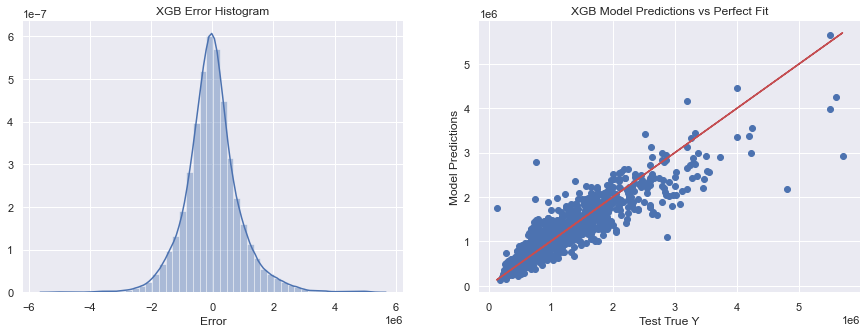

In [72]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,XGB_ypred_test)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(1498, 1) - XGB_ypred_test
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='XGB Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='XGB Model Predictions vs Perfect Fit')

[Text(0, 0.5, 'LGBM Model Predictions'),
 Text(0.5, 0, 'Test True Y'),
 Text(0.5, 1.0, 'LGBM Model Predictions vs Perfect Fit')]

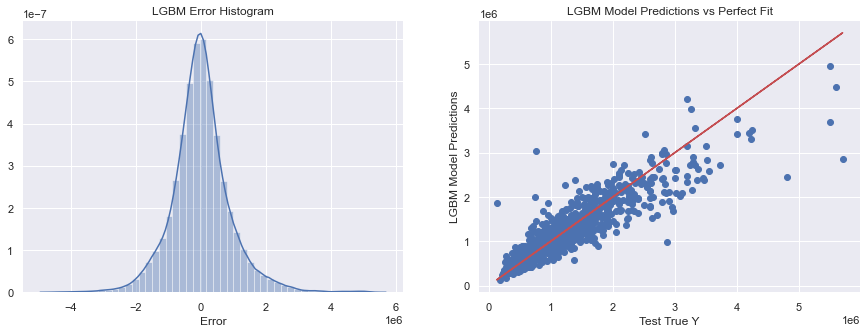

In [73]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,LGBM_ypred_test)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(1498, 1) - LGBM_ypred_test
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='LGBM Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='LGBM Model Predictions', title='LGBM Model Predictions vs Perfect Fit')

**Model predictions vs perfect fit**

We can compare the model predictions with a perfect fit to see how accurate the model is.
The red line represents the perfect prediction.
All two  models shows a similar pattern. The results are being punish by the outliers, which are the expensive houses. 
1. Our model is not good predicting luxury houses. Or houses above 4 millions
2. On the other hand, our model is good predicting the price of houses between 0 and  USD 3 million. There is a good fit, if we refer that the price distribution of the model is left skewed than normally distributed.
3. It may be worth it retraining our model just on price houses below USD 4 million.

## CONCLUSION & FURTHER RESEARCH

**Model Recommendation**

Based on previous model evaluations, we could draw some conclusion and recommendation:

1. Both XGB and LGBM model results is relatively close to each other. Hence, both of the models are recommended to be used in this analysis.
2. LGBM has an upper advantage than XGB because it has the best overall score, and also **faster** process and iteration than XGB. Therefore, LGBM is a better model in comparison.

In [77]:
corr_ranking = df2_copy.corr()['Price'].sort_values(ascending=False)[1:]
corr_ranking

BuildingArea     0.61
Rooms            0.58
Bedroom2         0.56
Bathroom         0.53
Car              0.29
Longtitude       0.25
Postcode         0.22
Landsize         0.16
Propertycount   -0.04
Distance        -0.10
Lattitude       -0.24
YearBuilt       -0.31
Name: Price, dtype: float64

In [76]:
columns = ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']

LGBM_Importance = pd.DataFrame({
    'Importance': LGBM_cv_model.best_estimator_.feature_importances_*100}, index=columns)

LGBM_Importance.sort_values(by='Importance', ascending=False)

,Importance
BuildingArea,58000
Landsize,49700
Distance,45400
Postcode,44400
Propertycount,35400
YearBuilt,32200
Rooms,12500
Car,10200
Bathroom,9900
Bedroom2,8600


**CONCLUSION**

**For Real Estate Company:**

1. Consumers are willing to pay a higher price if they get a **bigger building area**. This imply that increasing building area is the most important to yield a higher value in house price.
2. Consumers are also willing to pay a higher price if they get a **bigger landsize**. This imply that increasing landsize is determining house price, following BuildingArea
3. Consumers are willing to pay a higher price for a location that is **more distant than Metro's Central Business District**. This imply that a central area is not favorable, or suburban gives higher price. This is probably because in Melbourne, suburban area is more expensive, because it is usually an elite area.
4. Consumers are also willing to pay more if their neighborhood has **many property counted**. This means, if a neighborhood has only few houses, it will yield low price.

**Further Research**

1. Based on the model prediction vs perfect fit analysis, it may be worthy to retrain data with **less than 4 million USD**
2. Based on the model analysis, it is best to make a further test with **different year data**
3. Since the feature importance between each model is different, it might be beneficial to conduct **further post-hoc analysis** to test the feature importance between models with consumer preference/behavior